In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

from scipy.stats import entropy

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import scanpy as sc
import squidpy as sq

import pickle

In [26]:
sc.set_figure_params(vector_friendly=True, dpi_save=300) 
sns.set_theme(style="white") 
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

In [3]:
adata = sc.read_10x_h5(
    filename="./Data/cell_feature_matrix.h5"
)

In [7]:
cells = pd.read_csv(
    "./Data/cells.csv.gz",compression='gzip',index_col=0
)
cells.index = cells.index.astype('str')
cells.head()

,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area
cell_id,,,,,,,,
1,847.259912,326.191365,28,1,0,29,58.387031,26.642187
2,826.341995,328.031830,94,0,0,94,197.016719,42.130781
3,848.766919,331.743187,9,0,0,9,16.256250,12.688906
4,824.228409,334.252643,11,0,0,11,42.311406,10.069844
5,841.357538,332.242505,48,0,0,48,107.652500,37.479687


In [8]:
anno = pd.read_csv(
    "./Data/GSM7780153_Xenium_R1_Fig1-5_supervised.csv",index_col=0
)
anno.index = anno.index.astype('str')
anno.head()

,Cluster
Barcode,
1.0,DCIS_1
2.0,DCIS_1
3.0,Unlabeled
4.0,Invasive_Tumor
5.0,DCIS_1


In [9]:
cells['Cluster'] = list(anno['Cluster'])

In [10]:
adata.obs = cells.copy()

In [11]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [12]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.08838749926953768
Negative decoding count % : 0.006644247962710972


<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

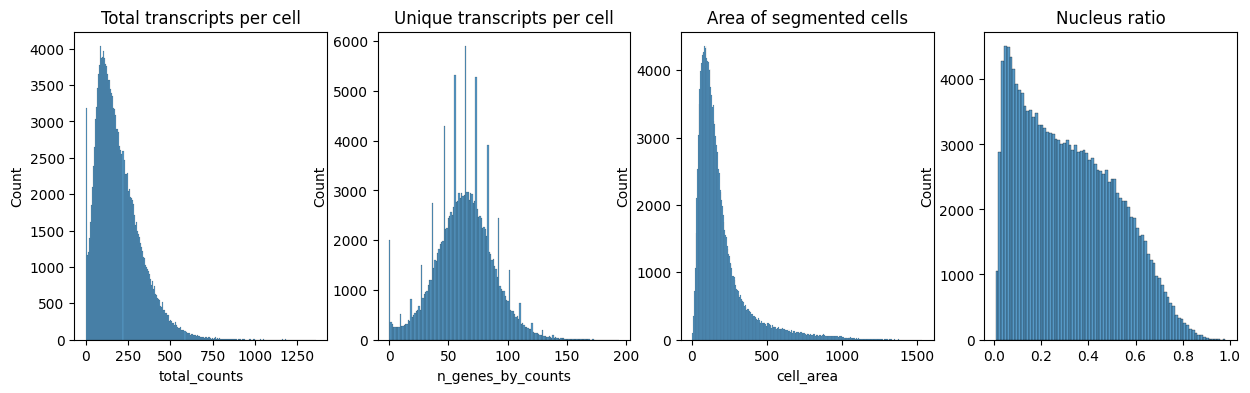

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

In [14]:
sc.pp.filter_cells(adata, min_counts=100)
sc.pp.filter_genes(adata, min_cells=5)

In [ ]:
adata

AnnData object with n_obs × n_vars = 123273 × 313
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'Cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

In [16]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
adata.obsm['spatial'] = np.array(adata.obs.loc[:,['x_centroid','y_centroid']])

In [23]:
palette=["#00BFFF", "#6A3D9A", "#B3E2CD", "#E6AB02", "#48D1CC", ##1-5
         "#F4CAE4", "#EE82EE", "#FDCDAC", "#99CCCC", "#ABD9E9", ##6-10
         "#1A9850", "#9933CC", "#B3EE3A", "#87CEFA", "#E08214", ##11-15
         "#9970AB", "#DE77AE", "#F1E2CC", "#B3CDE3", "#FFFF99", ##16-20
         "#66C2A5", "#FF00CC", "#276419", "#CC99FF"] # 21-24

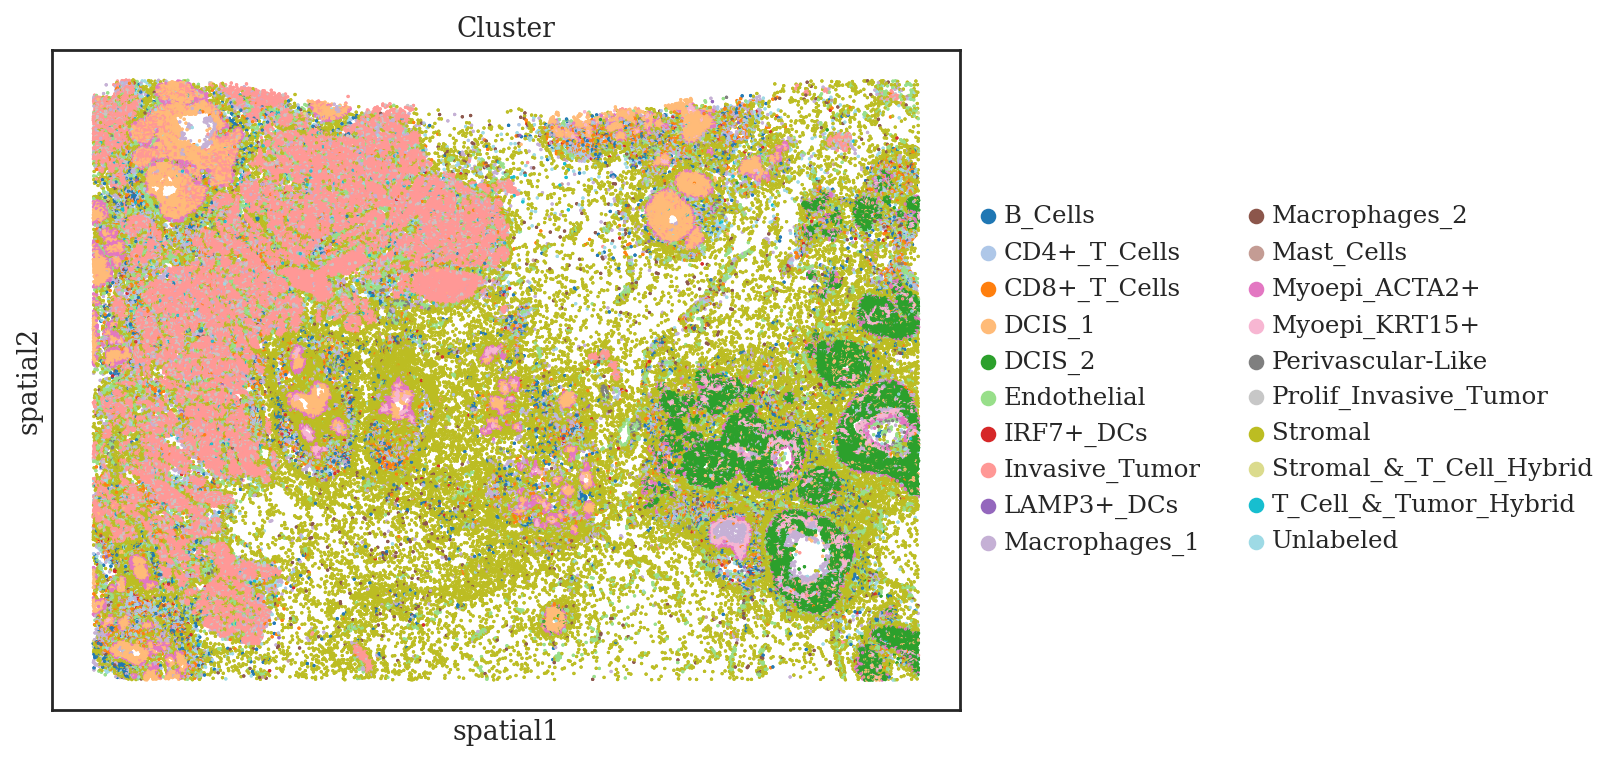

In [30]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "Cluster",
    ],
    palette = "tab20",
    wspace=0.4,
    figsize=(10,10),
    save = 'Figures/1_CellTypePlot.pdf'
)

In [ ]:
adata.obs.to_csv("./Data/obs.csv")

In [35]:
adata.obs.Cluster.value_counts()

Cluster
Stromal                    33907
Invasive_Tumor             29481
DCIS_2                     12153
DCIS_1                      9648
Macrophages_1               7123
Endothelial                 6766
Myoepi_ACTA2+               5735
Prolif_Invasive_Tumor       3562
CD8+_T_Cells                3183
B_Cells                     2650
Unlabeled                   2612
Myoepi_KRT15+               2447
CD4+_T_Cells                1444
Macrophages_2               1047
T_Cell_&_Tumor_Hybrid        424
Perivascular-Like            342
IRF7+_DCs                    313
Stromal_&_T_Cell_Hybrid      246
Mast_Cells                    98
LAMP3+_DCs                    92
Name: count, dtype: int64

In [36]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)

In [37]:
rows, cols = adata.obsp['spatial_distances'].nonzero()
values = adata.obsp['spatial_distances'].data

Spatial_Net = pd.DataFrame({
    'Cell1': rows,
    'Cell2': cols,
    'Distance': values
})


In [38]:
Spatial_Net

,Cell1,Cell2,Distance
0,0,10883,43.875012
1,0,11786,38.105913
2,0,31990,63.220620
3,0,34,45.092077
4,0,1,39.734925
...,...,...,...
739555,123272,10193,14.348225
739556,123272,123271,12.879839
739557,123272,123226,27.404667
739558,123272,10195,12.404883


In [39]:
id_cell_trans = dict(zip(range(adata.shape[0]), np.array(adata.obs.index), ))
Spatial_Net['Cell1'] = Spatial_Net['Cell1'].map(id_cell_trans)
Spatial_Net['Cell2'] = Spatial_Net['Cell2'].map(id_cell_trans)

In [40]:
Spatial_Net['cluster'] = Spatial_Net['Cell2'].map(adata.obs['Cluster'])

In [41]:
Spatial_Net.dtypes

Cell1         object
Cell2         object
Distance     float64
cluster     category
dtype: object

In [42]:
Spatial_Net.to_csv("./Data/spatial_net.csv")

In [33]:
Spatial_Net = pd.read_csv("./Data/spatial_net.csv",index_col=0)

In [43]:
spatial_net_df = Spatial_Net.pivot_table(index='Cell1', columns='cluster',fill_value=0, aggfunc='size')
spatial_net_df.index = spatial_net_df.index.astype(str)

In [44]:
spatial_net_df

cluster,B_Cells,CD4+_T_Cells,CD8+_T_Cells,DCIS_1,DCIS_2,Endothelial,IRF7+_DCs,Invasive_Tumor,LAMP3+_DCs,Macrophages_1,Macrophages_2,Mast_Cells,Myoepi_ACTA2+,Myoepi_KRT15+,Perivascular-Like,Prolif_Invasive_Tumor,Stromal,Stromal_&_T_Cell_Hybrid,T_Cell_&_Tumor_Hybrid,Unlabeled
Cell1,,,,,,,,,,,,,,,,,,,,
100,0,0,0,2,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
10000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0,0
100000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,1
100001,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0
99996,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
LRpair = pd.read_csv("/home/liuchang/4.0_Resource/lr/human_lr_pair.txt",sep="\t")

In [46]:
cell1R = LRpair[['receptor_gene_symbol']]
cell2L = LRpair[['ligand_gene_symbol']]

In [48]:
cell_gene_matrix = pd.DataFrame(adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)

In [49]:
cell_gene_matrix

,ABCC11,ACTA2,ACTG2,ADAM9,ADGRE5,ADH1B,ADIPOQ,AGR3,AHSP,AIF1,...,TUBB2B,TYROBP,UCP1,USP53,VOPP1,VWF,WARS,ZEB1,ZEB2,ZNF562
cell_id,,,,,,,,,,,,,,,,,,,,,
15,0.000000,0.000000,1.504077,0.000000,0.0,0.000000,0.0,2.079442,0.0,1.011601,...,1.011601,0.0,0.000000,1.832581,0.000000,0.0,1.504077,0.0,0.0,0.000000
57,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.038893,0.0,0.000000,...,0.000000,0.0,1.038893,1.537335,1.868452,0.0,0.000000,0.0,0.0,0.000000
68,1.651356,0.000000,1.337462,2.082364,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.532004,0.000000,0.0,0.000000,0.0,0.0,0.532004
69,1.832581,0.000000,0.000000,1.681759,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.628609,0.000000,0.0,0.628609,0.0,0.0,0.000000
72,0.000000,0.975896,0.000000,2.030011,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.975896,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167775,1.474530,0.445645,0.445645,0.987491,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.752828,0.987491,0.0,0.445645,0.0,0.0,0.752828
167776,1.041711,0.650777,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.041711,...,0.000000,0.0,0.000000,0.000000,1.041711,0.0,0.000000,0.0,0.0,0.650777
167778,1.136508,0.424593,1.293311,0.000000,0.0,0.000000,0.0,0.424593,0.0,0.000000,...,0.000000,0.0,0.000000,0.721703,0.721703,0.0,0.000000,0.0,0.0,0.950461


In [40]:
LRpair

,lr_pair,ligand_gene_symbol,receptor_gene_symbol,ligand_gene_id,receptor_gene_id,ligand_ensembl_protein_id,receptor_ensembl_protein_id,ligand_ensembl_gene_id,receptor_ensembl_gene_id,evidence
0,SEMA3F_PLXNA3,SEMA3F,PLXNA3,6405,55558,ENSP00000002829,ENSP00000358696,ENSG00000001617,ENSG00000130827,15721238
1,SEMA3F_PLXNA1,SEMA3F,PLXNA1,6405,5361,ENSP00000002829,ENSP00000377061,ENSG00000001617,ENSG00000114554,26156437
2,SEMA3F_NRP1,SEMA3F,NRP1,6405,8829,ENSP00000002829,ENSP00000265371,ENSG00000001617,ENSG00000099250,9883722
3,SEMA3F_NRP2,SEMA3F,NRP2,6405,8828,ENSP00000002829,ENSP00000353582,ENSG00000001617,ENSG00000118257,15721238
4,CX3CL1_CX3CR1,CX3CL1,CX3CR1,6376,1524,ENSP00000006053,ENSP00000351059,ENSG00000006210,ENSG00000168329,"10699158,24218476"
...,...,...,...,...,...,...,...,...,...,...
3393,CGA_GPR84,CGA,GPR84,1081,53831,ENSP00000482232,ENSP00000450310,ENSG00000135346,ENSG00000139572,32196115
3394,ASIP_MC1R,ASIP,MC1R,434,4157,ENSP00000454804,ENSP00000451605,ENSG00000101440,ENSG00000258839,12851328
3395,VEGFA_ITGB3,VEGFA,ITGB3,7422,3690,ENSP00000478570,ENSP00000452786,ENSG00000112715,ENSG00000259207,32196115
3396,APELA_APLNR,APELA,APLNR,100506013,187,ENSP00000484618,ENSP00000475344,ENSG00000248329,ENSG00000134817,28663440


In [50]:
LRpair_selected = cell1R['receptor_gene_symbol'].isin(adata.var_names) & cell2L['ligand_gene_symbol'].isin(adata.var_names)

In [74]:
LRpair[LRpair_selected]["lr_pair"]

55        CEACAM6_EGFR
110        MMP2_PECAM1
612          CDH1_EGFR
1697      CXCL12_CXCR4
1800        CXCL12_CD4
1893       S100A8_CD69
2029         C1QA_CD93
2059       S100A8_CD68
2325        CD274_CD80
2398      S100A4_ERBB2
2445       S100A4_EGFR
2742     CXCL12_AVPR1A
2807        CD86_CTLA4
2983    PDCD1LG2_PDCD1
2984       CD274_PDCD1
3217       CXCL12_SDC4
3218         CCL5_SDC4
3255        EDN1_EDNRB
Name: lr_pair, dtype: object

In [52]:
cell1 = cell1R[LRpair_selected]
cell2 = cell2L[LRpair_selected]

In [53]:
receptor_matrix = cell_gene_matrix.loc[:,cell1['receptor_gene_symbol']]
ligand_matrix = cell_gene_matrix.loc[:,cell2['ligand_gene_symbol']]

In [54]:
receptor_matrix.columns = range(receptor_matrix.shape[1])
ligand_matrix.columns = range(ligand_matrix.shape[1])

In [55]:
ligand_matrix.index.astype(str)
Spatial_Net['Cell1'] = Spatial_Net['Cell1'].astype(str)

receptor_matrix.index.astype(str)
Spatial_Net['Cell2'] = Spatial_Net['Cell2'].astype(str)

In [56]:
expanded_ligand_mtx = ligand_matrix.reindex(Spatial_Net["Cell2"])
expanded_receptor_mtx = receptor_matrix.reindex(Spatial_Net["Cell1"])

In [61]:
interactions = pd.DataFrame(expanded_ligand_mtx.values * expanded_receptor_mtx.values)

In [60]:
interactionlr = interactions.sum(axis=1)

In [62]:
for i in range(interactions.shape[1]):
    Spatial_Net[i] = interactions[i]

In [63]:
Spatial_Net

,Cell1,Cell2,Distance,cluster,0,1,2,3,4,5,...,8,9,10,11,12,13,14,15,16,17
0,15,15148,43.875012,DCIS_1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,16308,38.105913,DCIS_1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.438928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,47016,63.220620,DCIS_1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,113,45.092077,DCIS_1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.590355,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,57,39.734925,DCIS_1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739555,167780,14246,14.348225,DCIS_2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739556,167780,167779,12.879839,DCIS_1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739557,167780,167729,27.404667,DCIS_2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.321765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739558,167780,14250,12.404883,DCIS_2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.591333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
Spatial_Net["Cell1"] = Spatial_Net["Cell1"].astype(int)

In [66]:
Spatial_Net_1 = Spatial_Net.drop(columns=['Cell2','Distance','cluster'])

In [67]:
Spatial_Net_1

,Cell1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.438928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.590355,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739555,167780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739556,167780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739557,167780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.321765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739558,167780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.591333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
result1 = Spatial_Net_1.groupby("Cell1", as_index=False).sum()

In [69]:
result1 

,Cell1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,15,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.658659,1.438928,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,57,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,7.052516,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,68,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,69,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,72,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,2.195748,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123268,167775,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
123269,167776,0.0,0.0,0.0,0.0,0.589164,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
123270,167778,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.275264,0.0,0.0,0.0,0.0,0.0,0.189218,0.0,0.0
123271,167779,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,3.105120,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [72]:
result1.to_csv("./Data/LRpair_matrix_nolabel.csv",index=False)

In [ ]:
result1 = pd.read_csv("./Data/LRpair_matrix_nolabel.csv",index_col=0)
obs = pd.read_csv("./Data/obs.csv",index_col=0)
result1.columns = ['CEACAM6_EGFR', 'MMP2_PECAM1', 'CDH1_EGFR', 'CXCL12_CXCR4', 'CXCL12_CD4', 'S100A8_CD69', 'C1QA_CD93', 
             'S100A8_CD68', 'CD274_CD80', 'S100A4_ERBB2', 'S100A4_EGFR', 'CXCL12_AVPR1A', 'CD86_CTLA4', 'PDCD1LG2_PDCD1', 
             'CD274_PDCD1', 'CXCL12_SDC4', 'CCL5_SDC4', 'EDN1_EDNRB']

result1.index = result1.index.astype(str)
obs.index = obs.index.astype(str)

In [12]:
result1.loc[:,"Cluster"] = obs.loc[result1.index,"Cluster"].values

In [15]:
result2 = result1.groupby("Cluster", as_index=False).mean()

In [20]:
result2 = result2.set_index("Cluster")

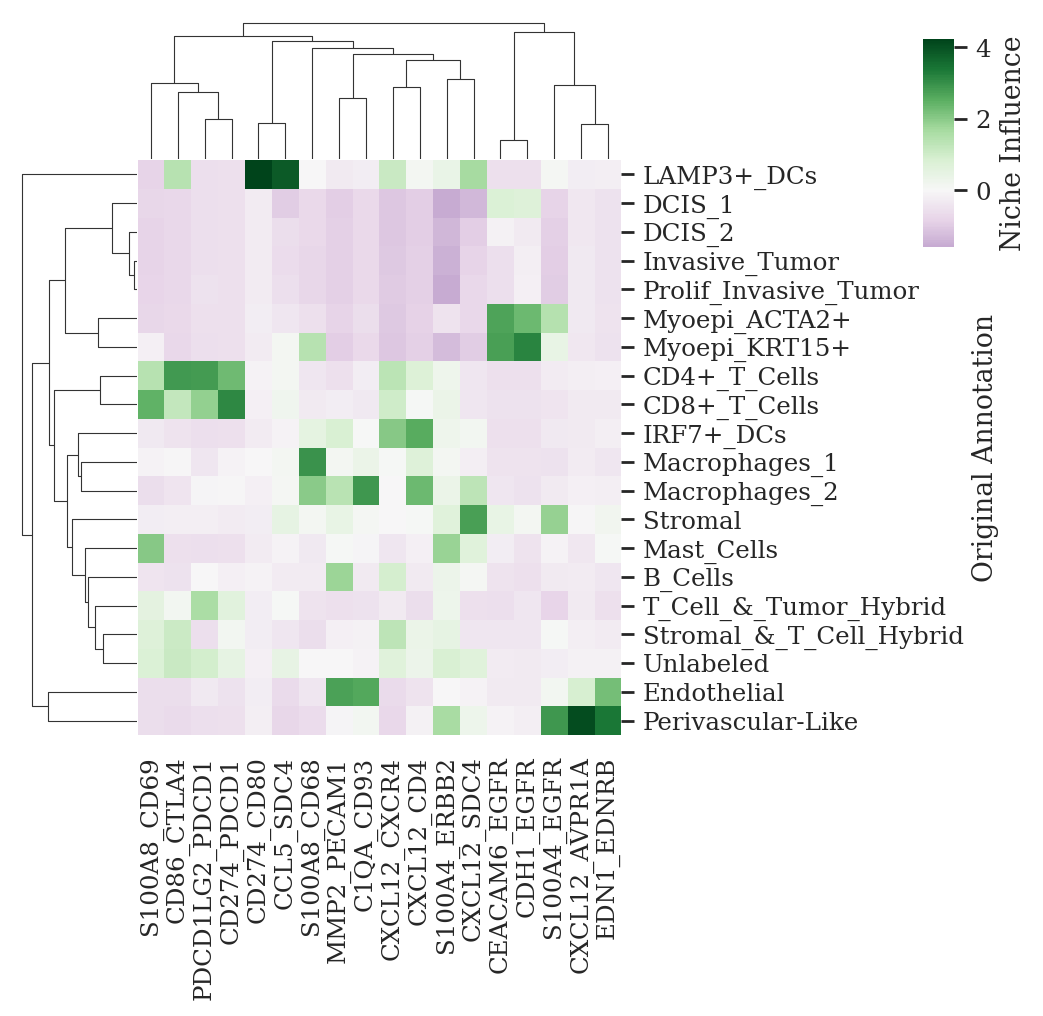

In [39]:
# sns.clustermap(result2,z_score=1,cmap="PRGn",center = 0,figsize=(8,8))
cg = sns.clustermap(
    result2,
    cmap="PRGn",
    center=0,
    z_score=1,
    row_cluster=True,
    col_cluster=True,
    figsize=(6.5, 6.5),
    cbar_kws={'label': 'Niche Influence'}
)

cg.ax_heatmap.set_ylabel("Original Annotation")
cg.cax.set_position([0.90, 0.75, 0.03, 0.20])

plt.show()

# # save as PDF
cg.fig.savefig(
    "./Figures/2_LR_ct.pdf",
    format='pdf',
    bbox_inches='tight'
)
